<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 下準備、データの読み込みと前処理

In [1]:
%pip install matplotlib
%pip install japanize-matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn
import collections
import math
import statistics
import requests
import io
import japanize_matplotlib
from cProfile import label
from cmath import log, log10
from distutils.log import Log
from tkinter import font

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=a323e8d75b3bf9b8ee4d5f69b333127094241dc6203b90b13968586651bc4a78
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.5f}'.format

In [3]:
%pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fileDownloaded = drive.CreateFile({'id': '1gZ-QBOBkQutB7Hx9HEC76DLNSfvxb8gc'})
fileDownloaded.GetContentFile('figure3_stock-code.csv')
fileDownloaded = drive.CreateFile({'id': '1ErAcUg5PyVo0T9IzPOQrgMGwf66IoZ3d'})
fileDownloaded.GetContentFile('figure3.csv')
dat1 = pd.read_csv('figure3_stock-code.csv',encoding = "cp932")
dat2 = pd.read_csv('figure3.csv',encoding = "cp932")


In [4]:
col1=dat1.columns.tolist()
col2=dat2.columns.tolist()
List1=[i for i in col1 if i in col2]
dat=pd.merge(dat1,dat2, on=List1, how='inner')
col4=[1,3,2,7,6,8,11]
dat=dat.iloc[:,col4]
dat.columns=['Name','FY','Stock Code','A(¥M)','Cash(¥M)','FA(¥M)','Inventory(¥M)']
def f(a):
          return a[:4]
dat['FY']=dat['FY'].apply(f).astype(int)

# 市場全体(マクロ的観点)での比率

In [5]:
DAT=dat.groupby('FY').sum()

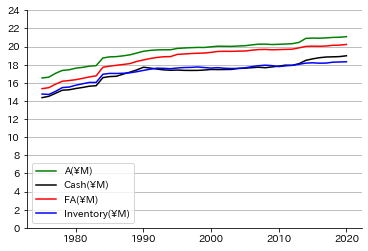

In [6]:
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(np.log(DAT['A(¥M)']),label='A(¥M)',c='green')
plt.plot(np.log(DAT['Cash(¥M)']),label='Cash(¥M)',c='k')
plt.plot(np.log(DAT['FA(¥M)']),label='FA(¥M)',c='red')
plt.plot(np.log(DAT['Inventory(¥M)']),label='Inventory(¥M)',c='blue')
plt.yticks(np.arange(0, 25, step=2))
plt.grid(axis="y")
plt.legend()
plt.show()

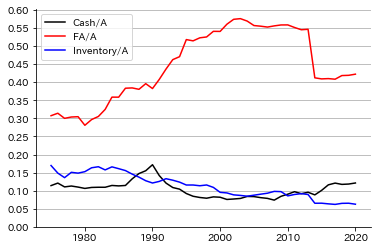

In [7]:
DAT['Cash/A']=DAT['Cash(¥M)']/DAT['A(¥M)']
DAT['FA/A']=DAT['FA(¥M)']/DAT['A(¥M)']
DAT['Inventory/A']=DAT['Inventory(¥M)']/DAT['A(¥M)']
for i in DAT.columns.tolist():
          DAT[i]=DAT[i].replace(0,np.nan)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(DAT['Cash/A'],label='Cash/A',c='k')
plt.plot(DAT['FA/A'],label='FA/A',c='red')
plt.plot(DAT['Inventory/A'],label='Inventory/A',c='blue')
plt.yticks(np.arange(0, 0.65, step=0.05))
plt.grid(axis="y")
plt.legend()
plt.show()

## 証券コードと産業・業界の関係整理

[証券コードによる業種分類](https://ib-college.com/shiki-a/#st-toc-h-2)参照

In [8]:
SIC=pd.DataFrame(
          data={'Min': pd.Series([1300, 1500,1700,2000,3000,3700,4000,5000,5100,5200,5400,5700,5900,6000,6500,7000,7700,7800,8000,8300,8600,8700,8800,9000,9100,9200,9300,9400,9500,9600]),
                'Max': pd.Series([1500,1700,2000,3000,3600,4000,5000,5100,5200,5400,5700,5800,6000,6500,7000,7500,7800,8000,8300,8600,8700,8800,9000,9100,9200,9300,9400,9500,9600,10000]),
                'Industry': pd.Series(['水産・農林業','鉱業','建設業','食料品','繊維製品','パルプ・紙','化学・医薬品','石油・石炭製品','ゴム製品','ガラス・土石製品','鉄鋼','非鉄金属','金属製品','機械','電気機器','輸送用機器','機密機器','その他製品','卸売業','銀行・その他金融','証券・先物取引所','保険','不動産','陸運','海運','空運','倉庫・運輸関連','情報通信','電気ガス','サービス業']) }
)

# 各企業を産業別に分類し、各々の比率を図示

In [9]:
List=[]
for i in range(len(SIC)):
          Dat = dat[(SIC.iloc[i,0] <= dat['Stock Code']) & (dat['Stock Code'] < SIC.iloc[i,1])]
          listI=[Dat, SIC.iloc[i,2]]
          List.append(listI)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


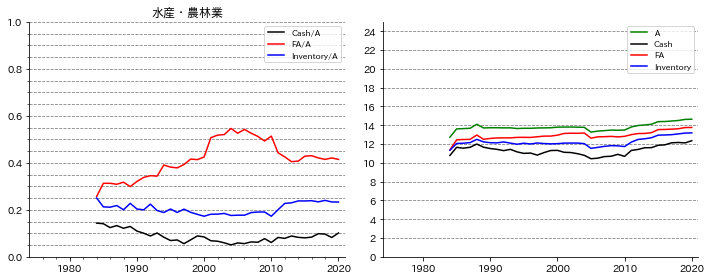

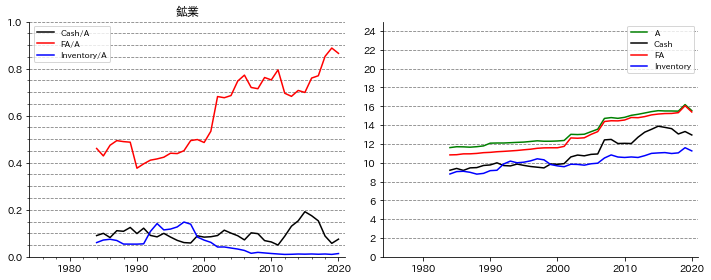

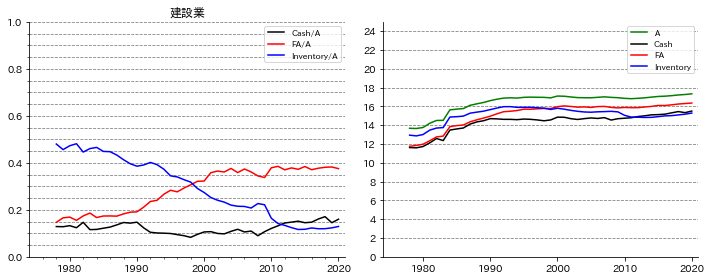

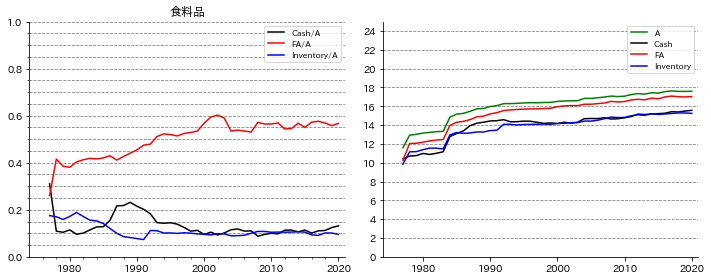

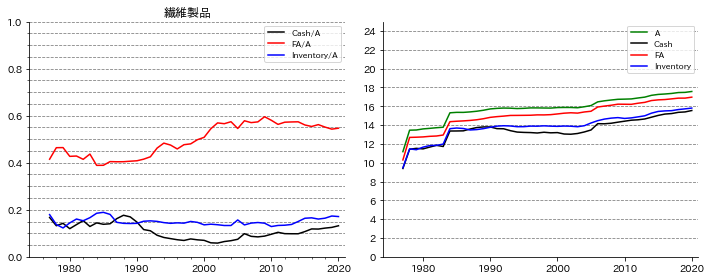

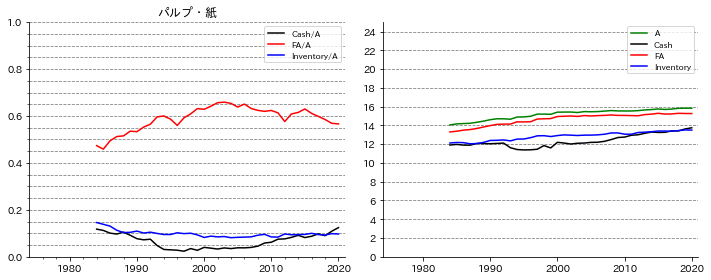

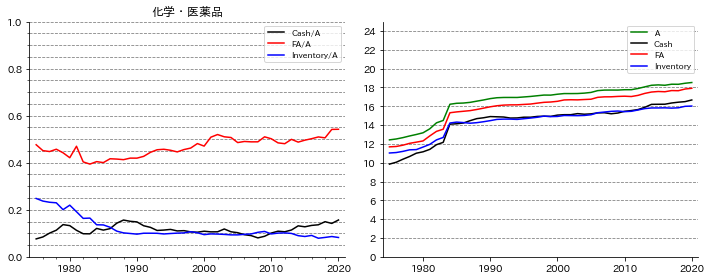

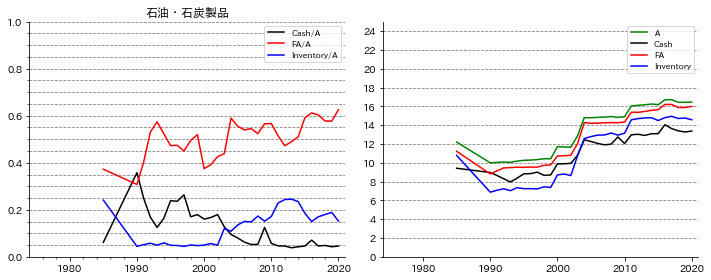

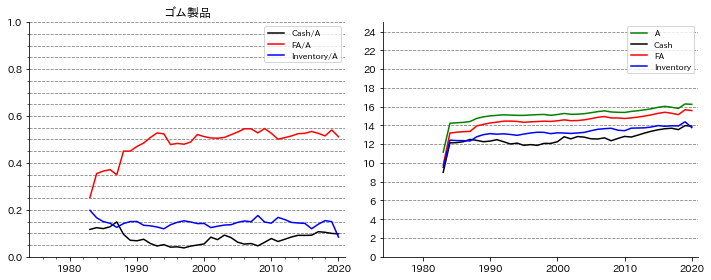

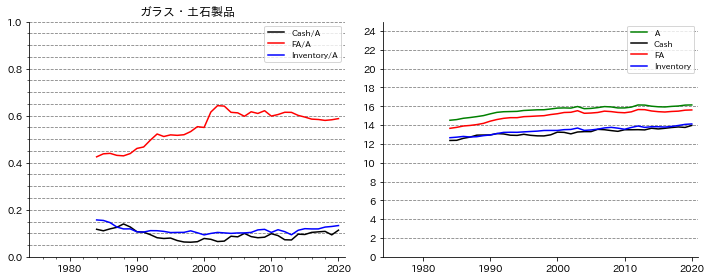

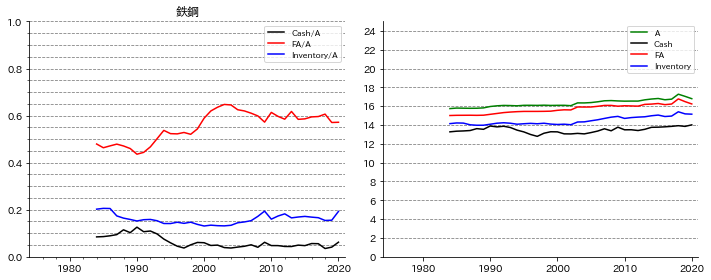

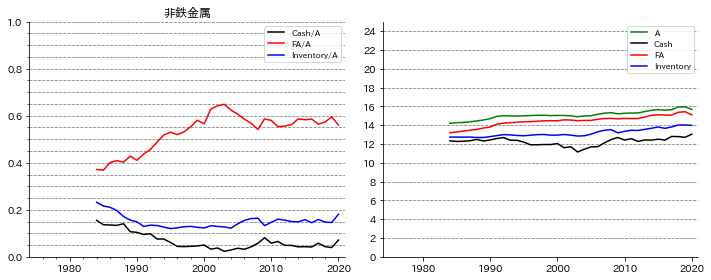

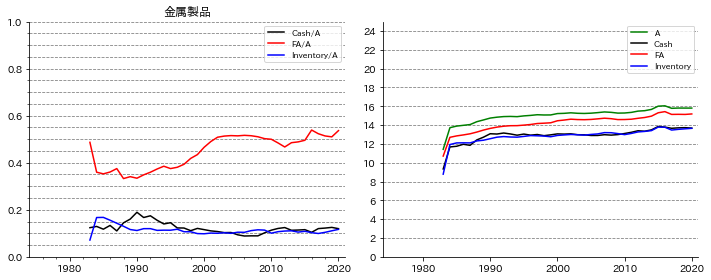

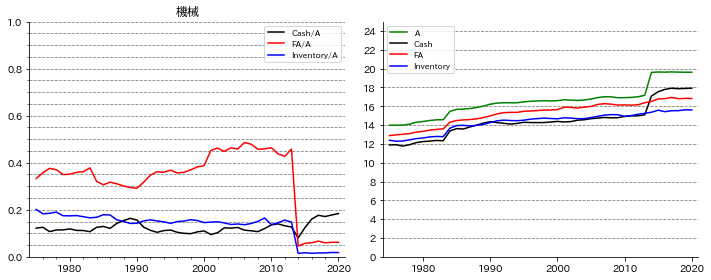

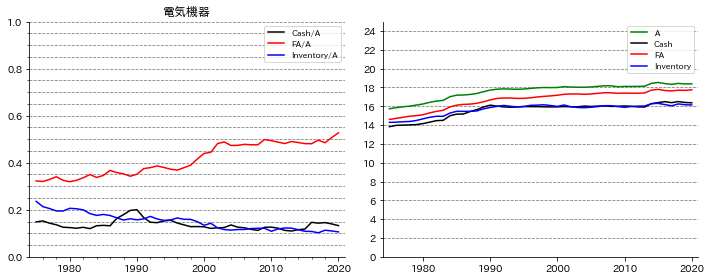

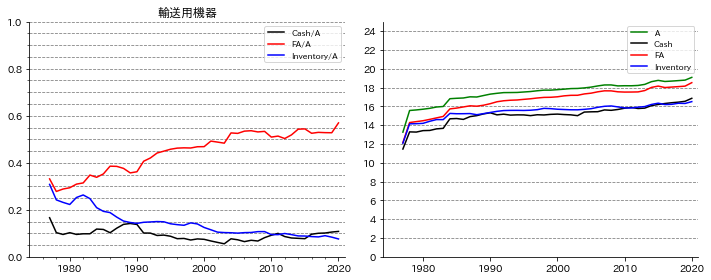

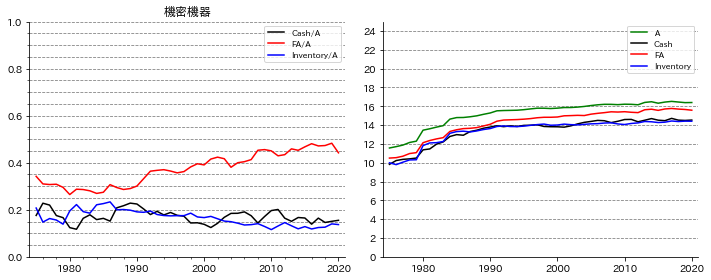

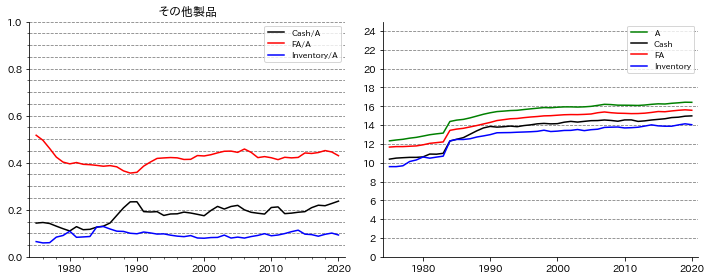

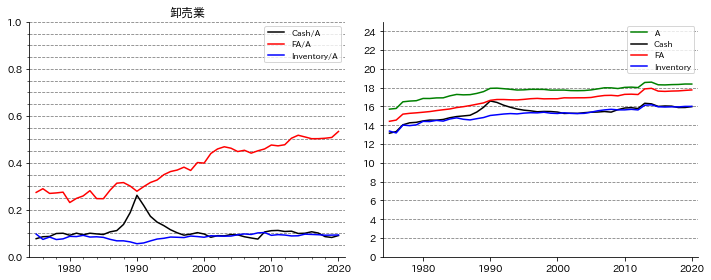

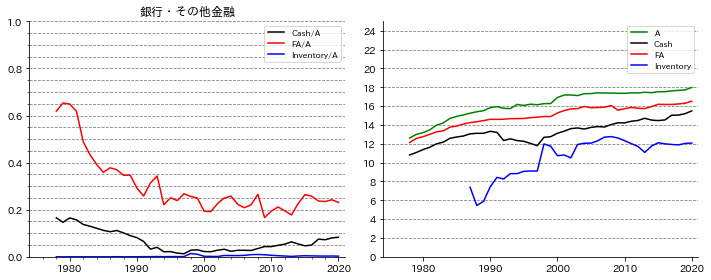

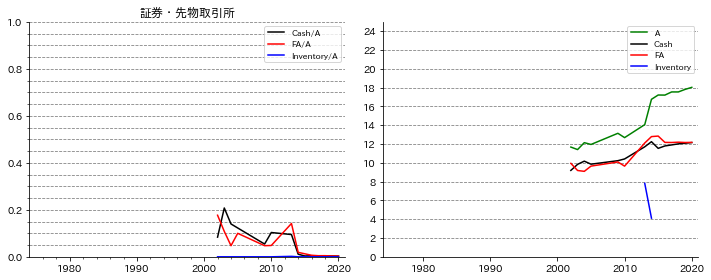

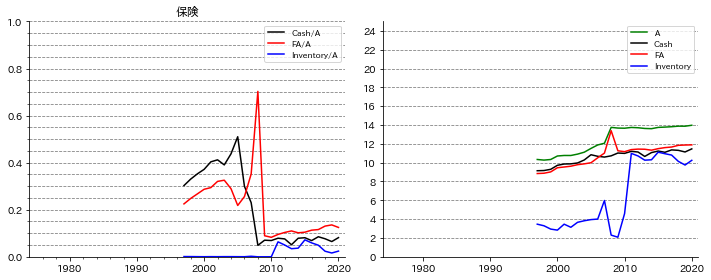

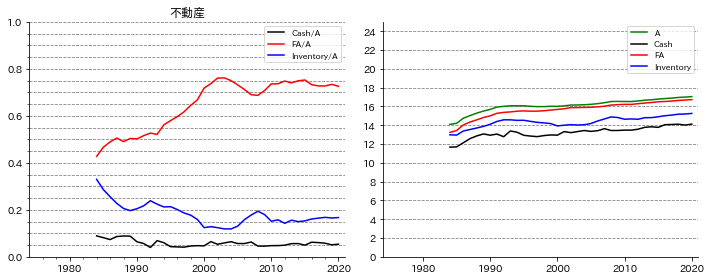

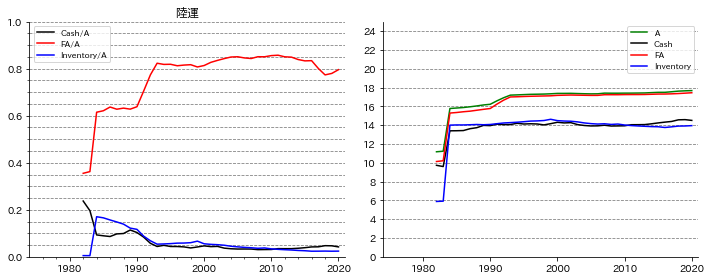

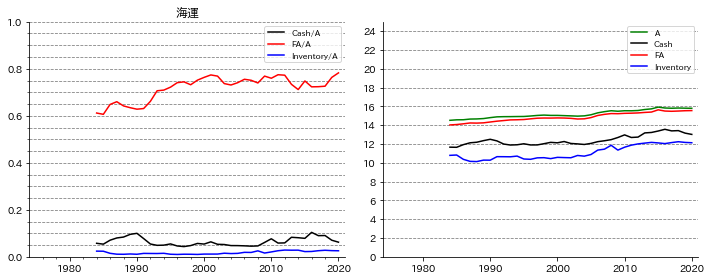

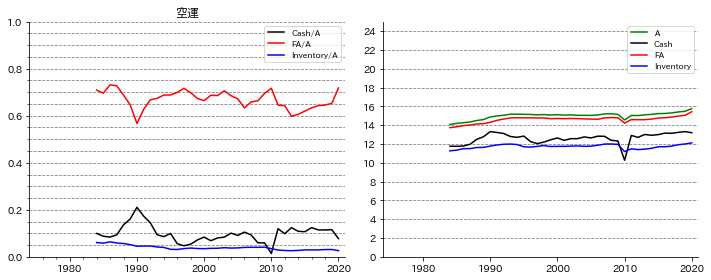

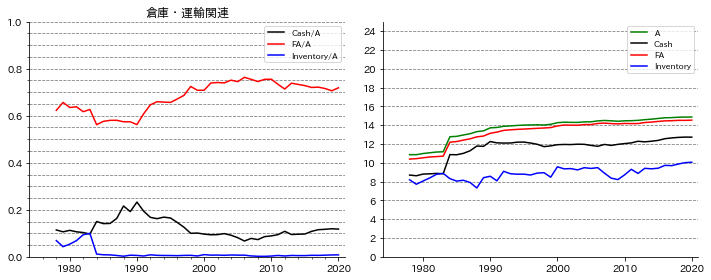

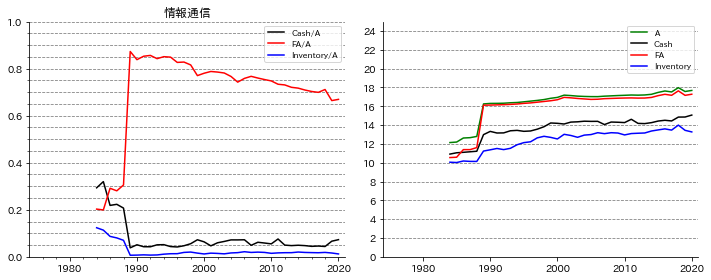

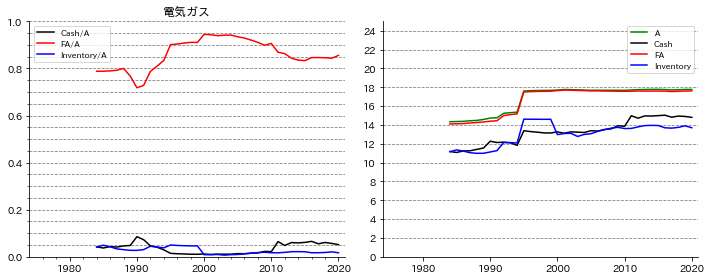

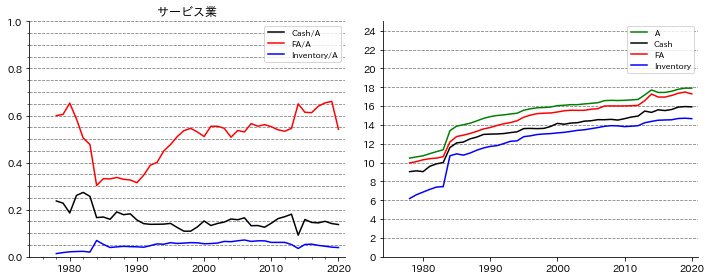

In [10]:
for j in range(len(List)):
          DF= List[j][0].groupby('FY').sum()
          DF['Cash/A']=DF['Cash(¥M)']/DF['A(¥M)']
          DF['FA/A']=DF['FA(¥M)']/DF['A(¥M)']
          DF['Inventory/A']=DF['Inventory(¥M)']/DF['A(¥M)']
          fig = plt.figure(figsize=(10,4))
          ax1 = fig.add_subplot(1,2,1)
          ax1.set_title(str(List[j][1]))
          ax1.spines['right'].set_visible(False)
          ax1.spines['top'].set_visible(False)
          ax1.plot(DF['Cash/A'],label='Cash/A',c='k')
          ax1.plot(DF['FA/A'], label='FA/A',c='red')
          ax1.plot(DF['Inventory/A'], label='Inventory/A',c='blue')
          ax1.legend(fontsize='small')
          ax1.set_xlim(1974, 2021)
          ax1.set_ylim(0, 1)
          ax1.minorticks_on()
          ax1.grid(which = "both", axis="y", color = "gray", linestyle="--")


          ax2 = fig.add_subplot(1,2,2)
          ax2.spines['right'].set_visible(False)
          ax2.spines['top'].set_visible(False)
          ax2.plot(np.log(DF['A(¥M)']), label='A',c='green')
          ax2.plot(np.log(DF['Cash(¥M)']), label='Cash',c='k')
          ax2.plot(np.log(DF['FA(¥M)']),label='FA',c='red')
          ax2.plot(np.log(DF['Inventory(¥M)']), label='Inventory',c='blue')
          ax2.legend(fontsize='small')
          ax2.set_xlim(1974, 2021)
          ax2.set_ylim(0, 25)
          ax2.set_yticks(np.arange(0,25,2))
          ax2.grid(axis="y", color = "gray", linestyle="--")
          fig.tight_layout()
          fig.show()
          # 右側のグラフは対数値

# 各企業ごとの比率の平均値

Kahle and Stultz の分析手法

In [11]:
dat['Cash/A']=dat['Cash(¥M)']/dat['A(¥M)']
dat['FA/A']=dat['FA(¥M)']/dat['A(¥M)']
dat['Inventory/A']=dat['Inventory(¥M)']/dat['A(¥M)']
Dat=dat.groupby('FY').mean()

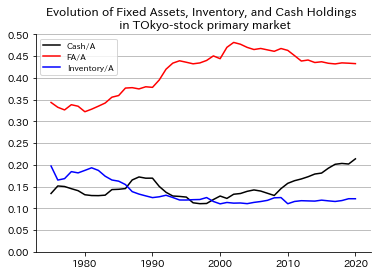

In [12]:
plt.title('Evolution of Fixed Assets, Inventory, and Cash Holdings \n in TOkyo-stock primary market')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(Dat['Cash/A'],c='k',label='Cash/A')
plt.plot(Dat['FA/A'],c='red',label='FA/A')
plt.plot(Dat['Inventory/A'],c='blue',label='Inventory/A')
plt.yticks(np.arange(0, 0.55, 0.05))
plt.grid(axis="y")
plt.legend(fontsize='small')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

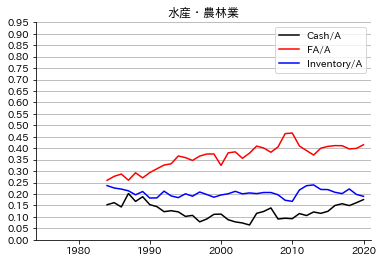

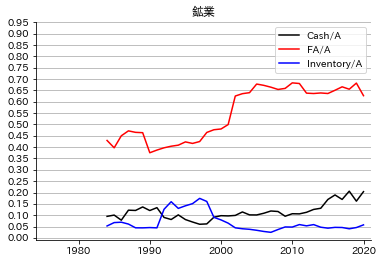

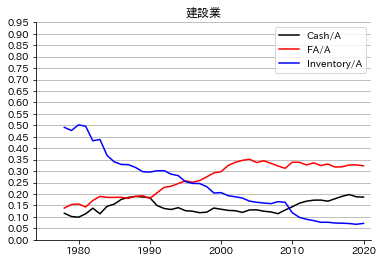

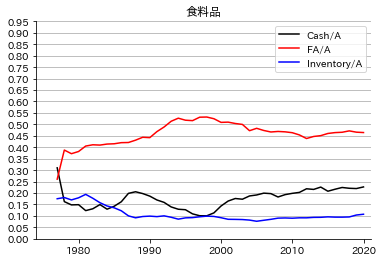

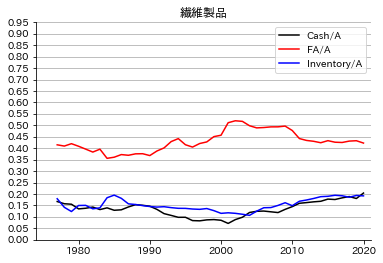

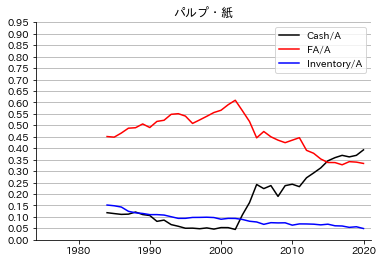

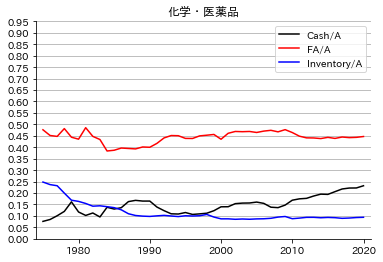

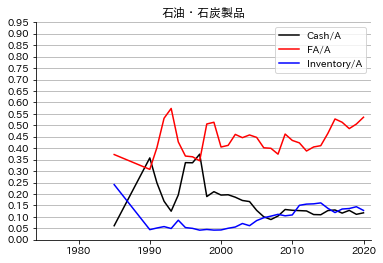

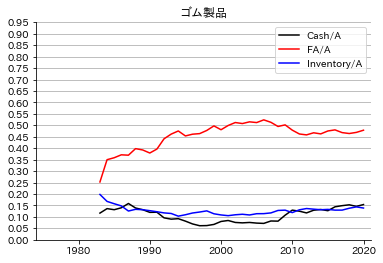

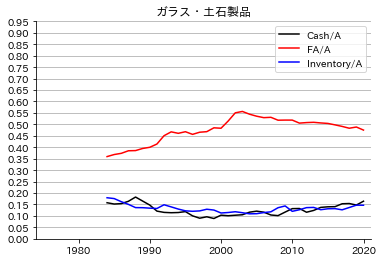

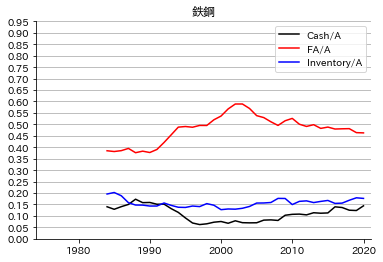

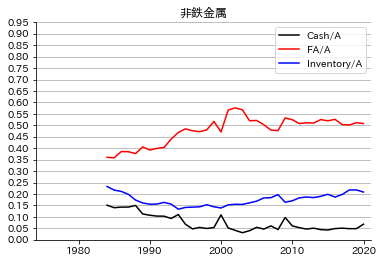

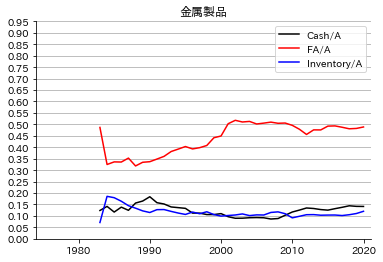

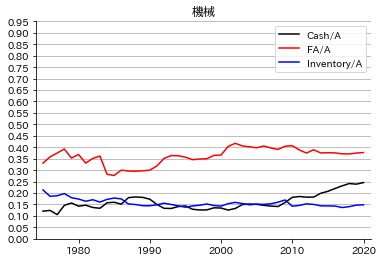

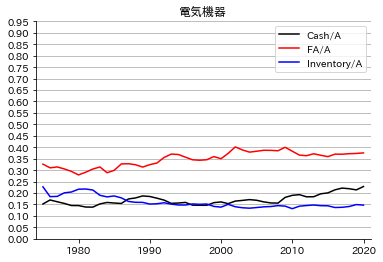

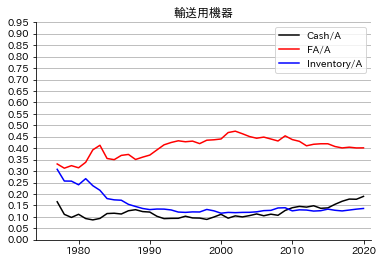

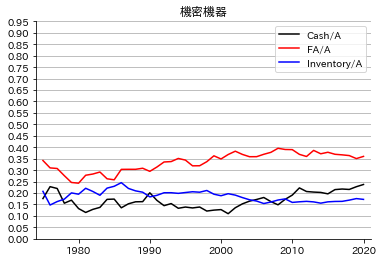

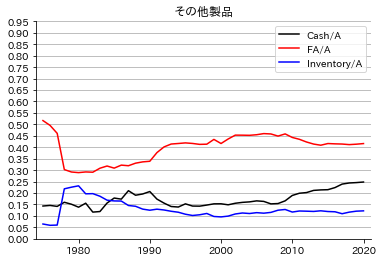

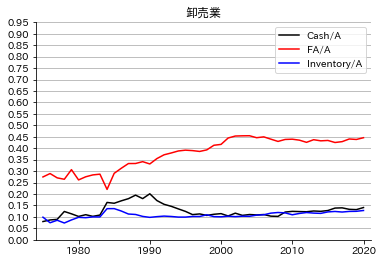

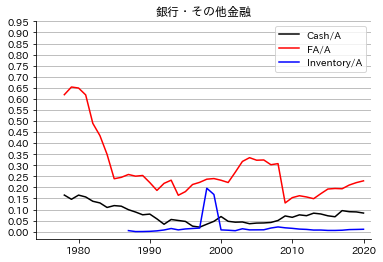

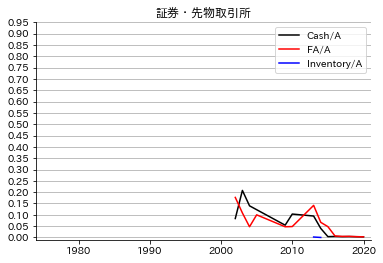

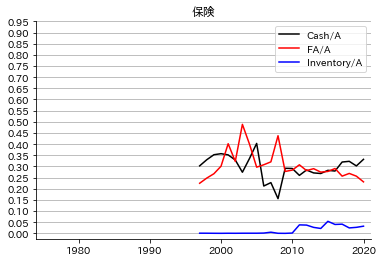

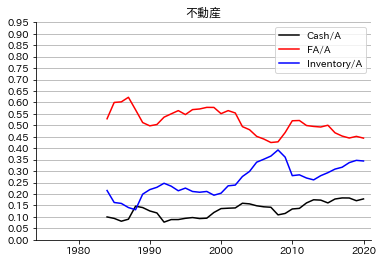

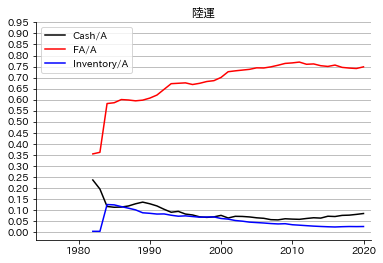

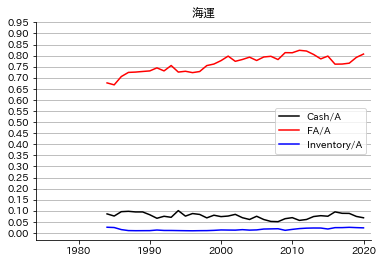

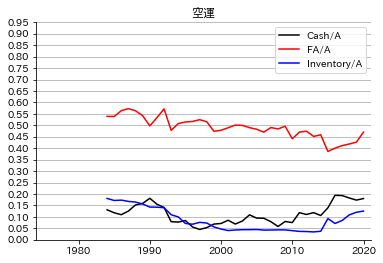

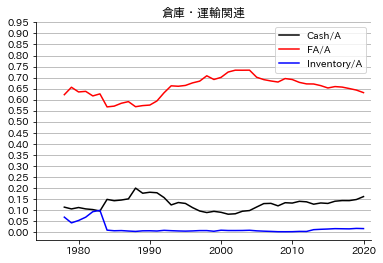

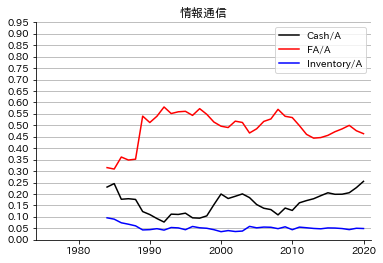

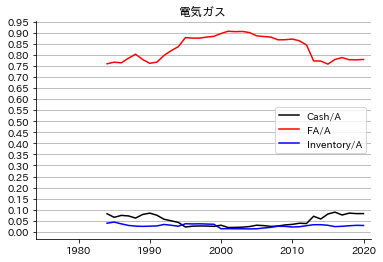

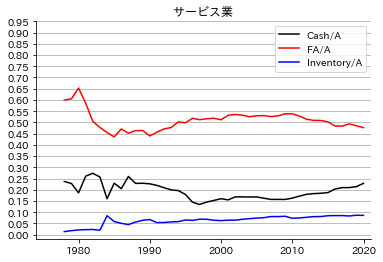

In [13]:
for j in range(len(List)):
          List[j][0]['Cash/A']=List[j][0]['Cash(¥M)']/List[j][0]['A(¥M)']
          List[j][0]['FA/A']=List[j][0]['FA(¥M)']/List[j][0]['A(¥M)']
          List[j][0]['Inventory/A']=List[j][0]['Inventory(¥M)']/List[j][0]['A(¥M)']
          df=List[j][0].groupby('FY').mean()
          plt.title(str(List[j][1]))
          plt.gca().spines['right'].set_visible(False)
          plt.gca().spines['top'].set_visible(False)
          plt.plot(df['Cash/A'], c='k', label='Cash/A')
          plt.plot(df['FA/A'], c='red', label='FA/A')
          plt.plot(df['Inventory/A'], c='blue', label='Inventory/A')
          plt.xlim(1974, 2021)
          plt.yticks(np.arange(0, 1, 0.05))
          plt.grid(axis="y")
          plt.legend()
          plt.show()

# 追検証

In [14]:
fileDownloaded = drive.CreateFile({'id': '1nyXiugyXGyK-TkHIo5s3QTdripRof7rt'})
fileDownloaded.GetContentFile('figure3_3.csv')
dat3 = pd.read_csv('figure3_3.csv',encoding = "cp932")
dat3.columns=['Name','Stock Code','FY','NIBIT(¥M)','CNI(¥M)']
dat3['FY']=dat3['FY'].apply(f).astype(int)

In [15]:
col5=[i for i in dat3.columns.tolist() if i in dat.columns.tolist()]
dat3=pd.merge(dat, dat3, on=col5, how='left')

In [16]:
q = []
for i in range(len(dat3)):
          if (dat3['A(¥M)'][i] != np.nan) & (dat3['NIBIT(¥M)'][i] != np.nan):
                    a = dat3['NIBIT(¥M)'][i]/dat3['A(¥M)'][i]
          else:
                    a = np.nan
          q.append(a)
dat3['ROA']= pd.Series(q)

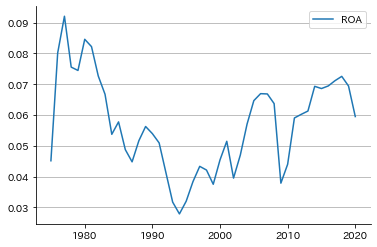

In [17]:
Df=dat3.groupby('FY').mean()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.plot(Df['ROA'],label='ROA')
plt.legend()
plt.grid(axis="y")
plt.show()

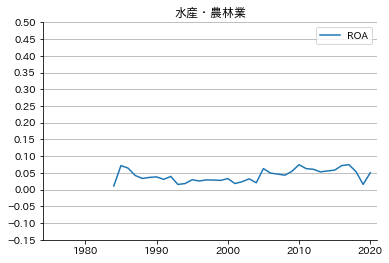

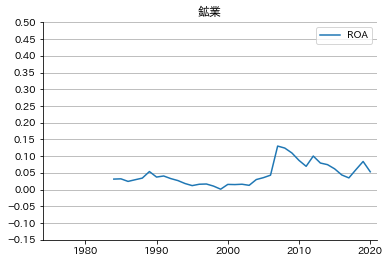

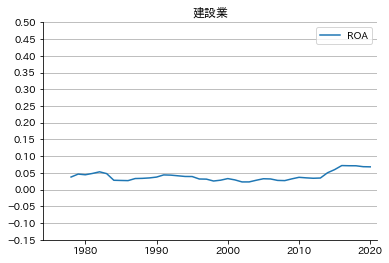

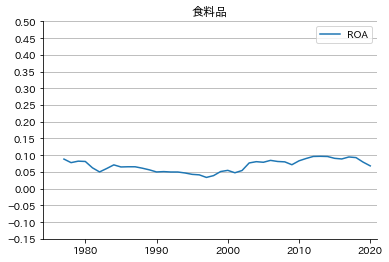

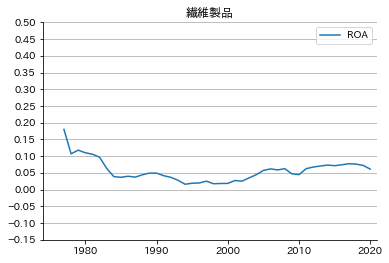

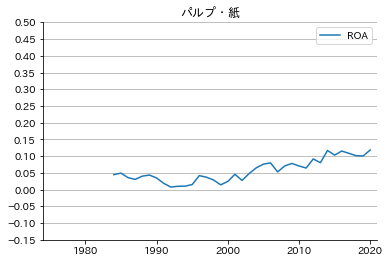

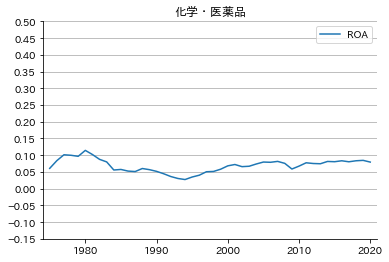

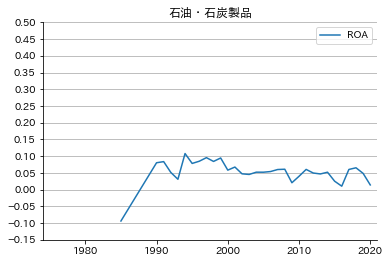

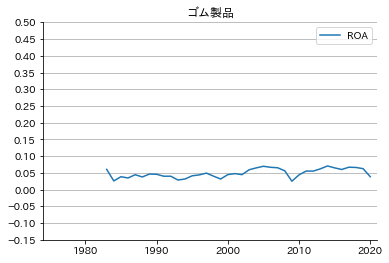

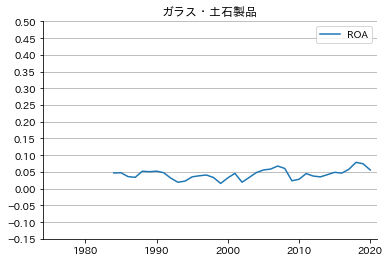

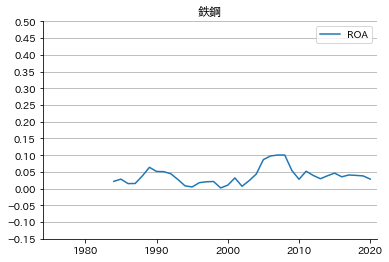

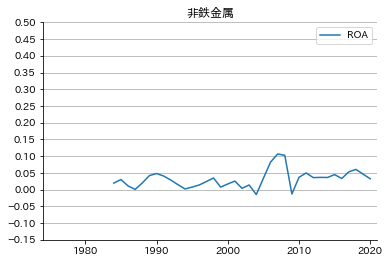

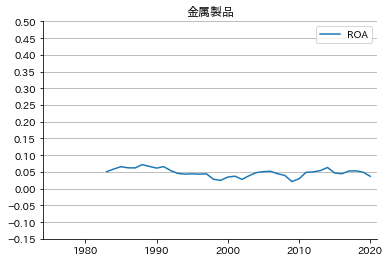

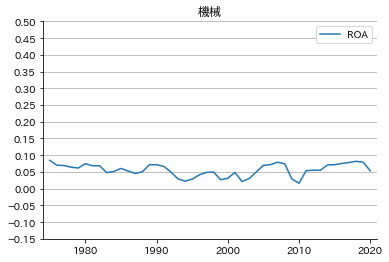

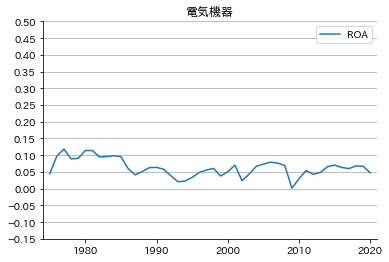

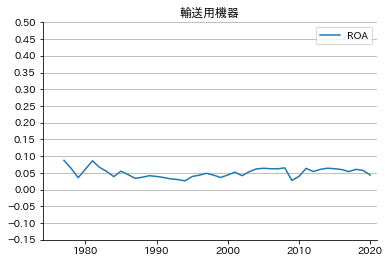

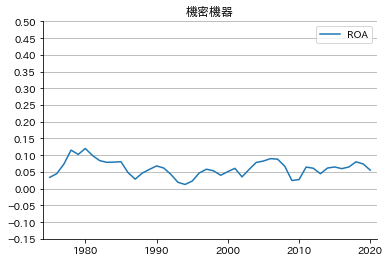

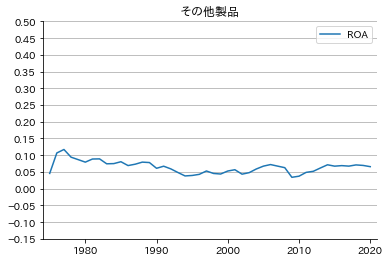

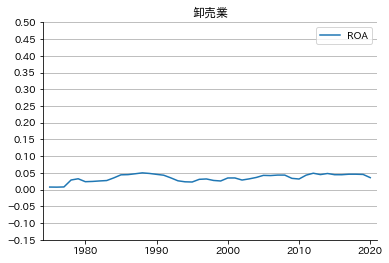

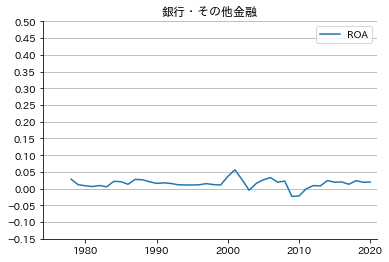

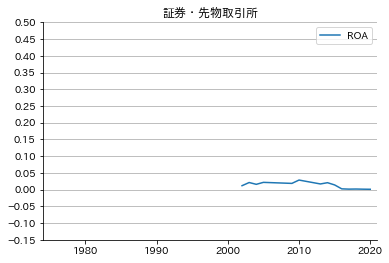

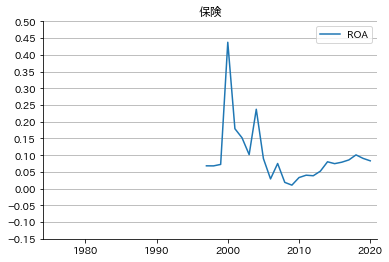

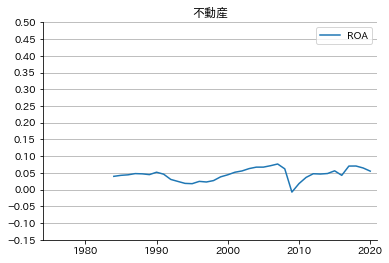

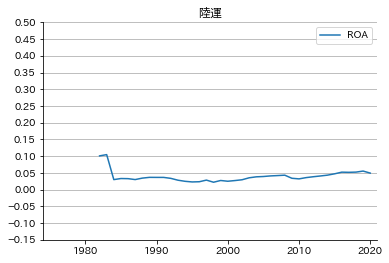

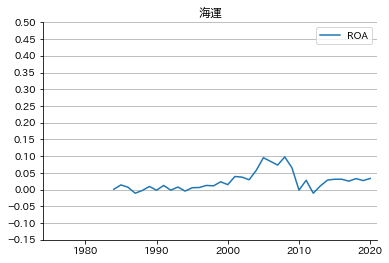

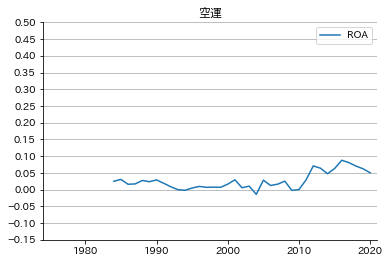

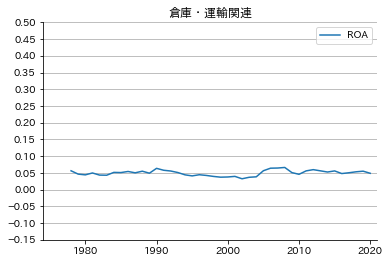

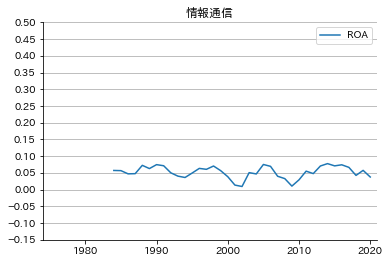

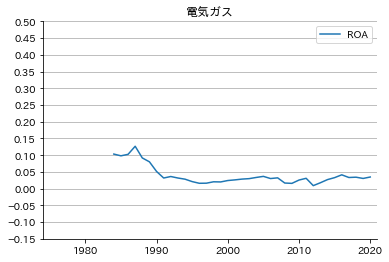

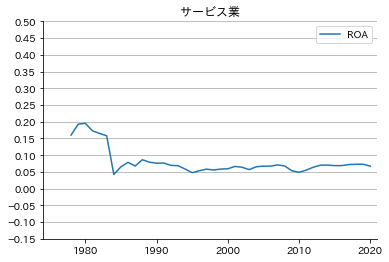

In [18]:
List=[]
for i in range(len(SIC)):
          Dat = dat3[(SIC.iloc[i,0] <= dat3['Stock Code']) & (dat3['Stock Code'] < SIC.iloc[i,1])]
          listI=[Dat, SIC.iloc[i,2]]
          List.append(listI)
for j in range(len(List)):
          df=List[j][0].groupby('FY').mean()
          plt.title(str(List[j][1]))
          plt.gca().spines['right'].set_visible(False)
          plt.gca().spines['top'].set_visible(False)
          plt.plot(df['ROA'], label='ROA')
          plt.xlim(1974, 2021)
          plt.yticks(np.arange(-0.15, 0.55, 0.05))
          plt.grid(axis="y")
          plt.legend()
          plt.show()

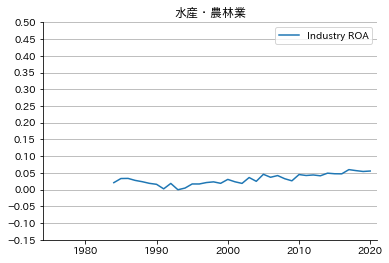

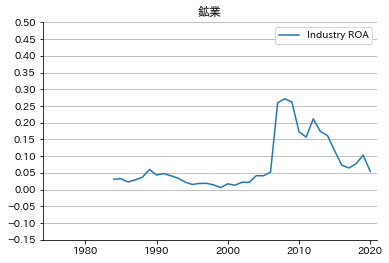

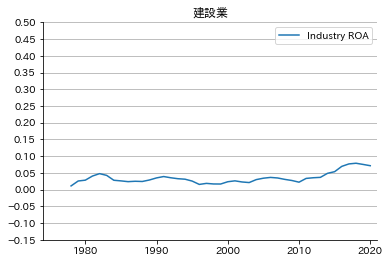

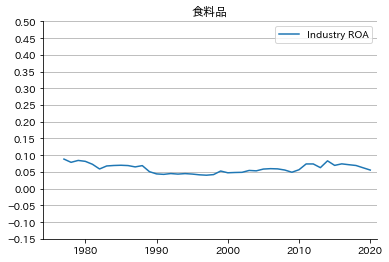

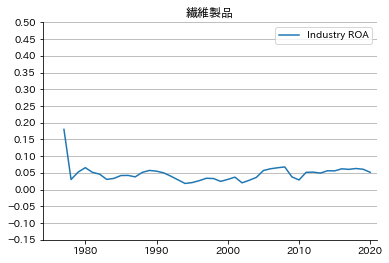

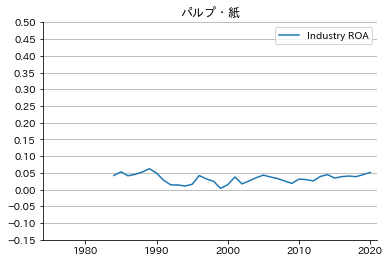

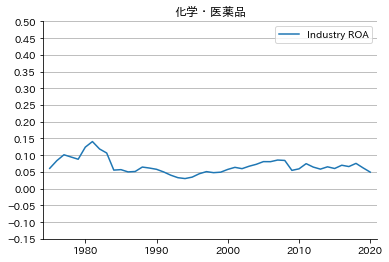

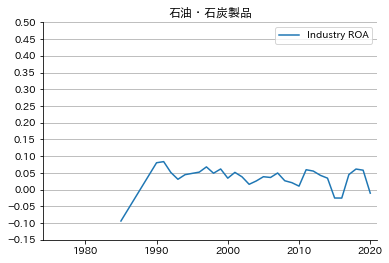

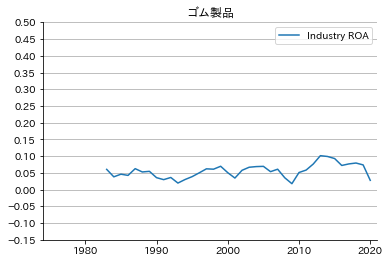

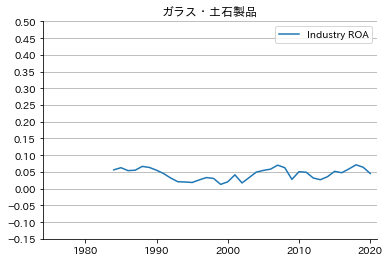

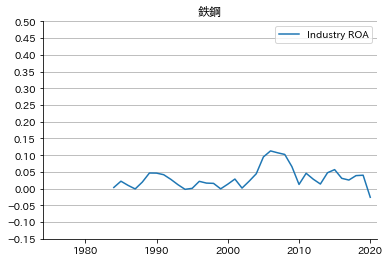

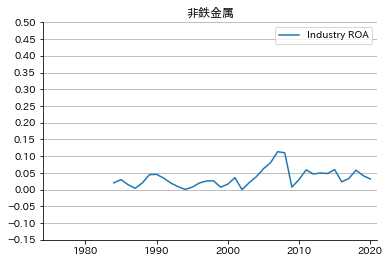

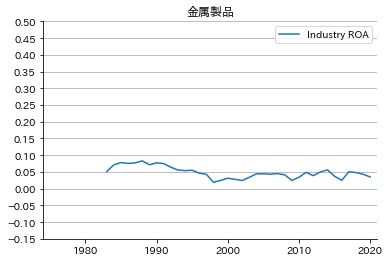

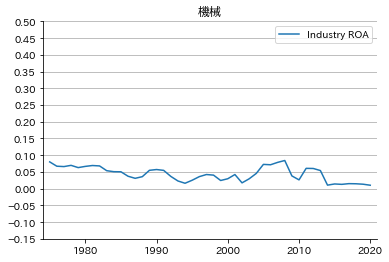

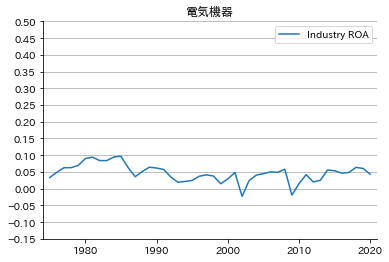

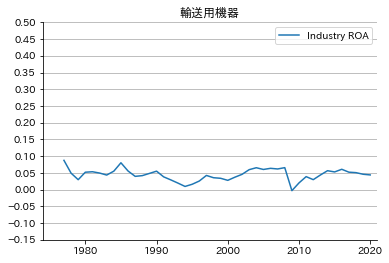

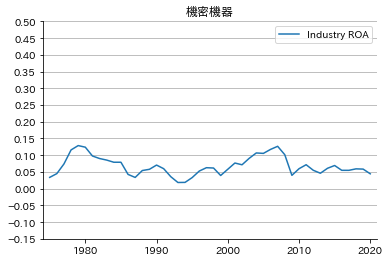

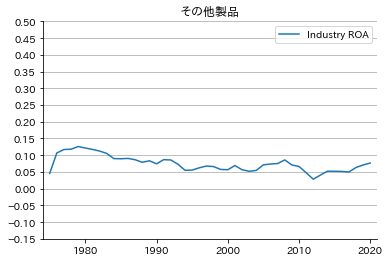

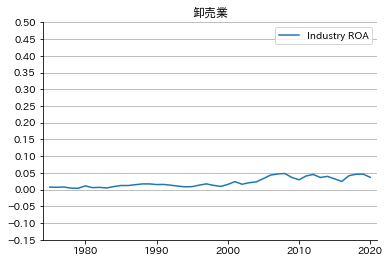

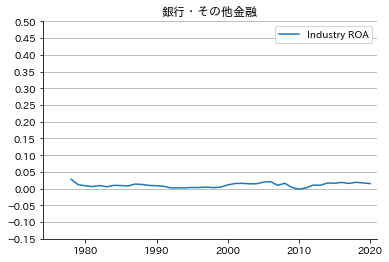

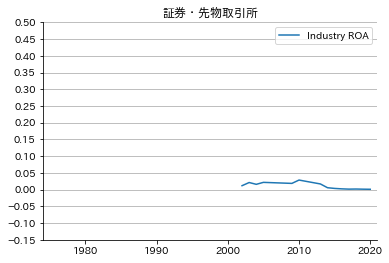

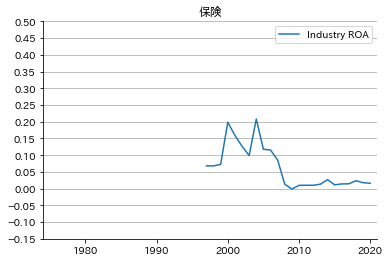

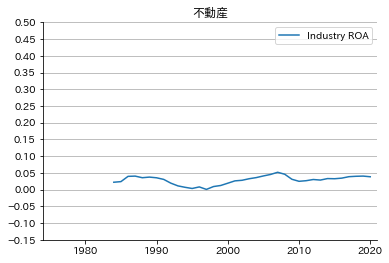

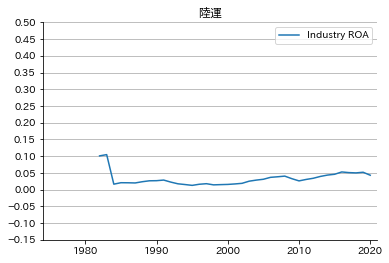

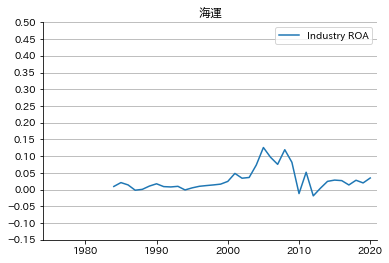

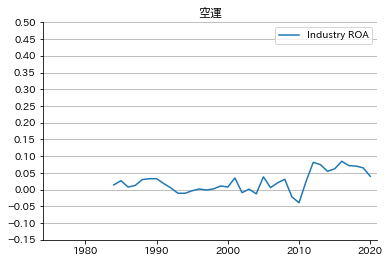

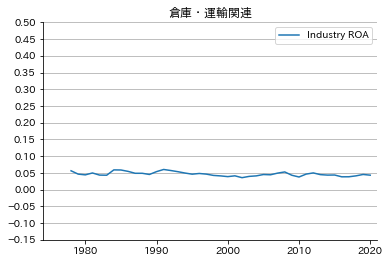

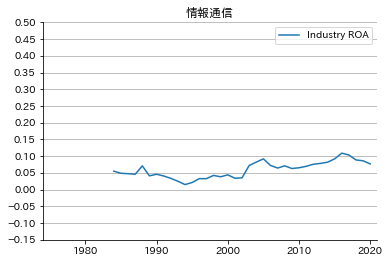

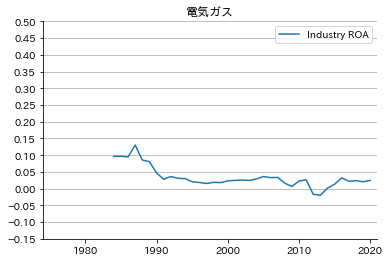

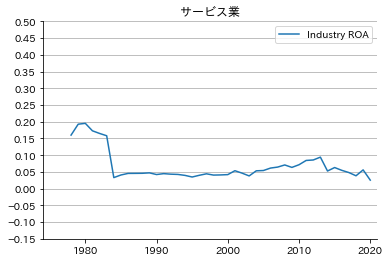

In [19]:
for j in range(len(List)):
          df=List[j][0].groupby('FY').sum()
          df['Aggregate ROA']=df['NIBIT(¥M)']/df['A(¥M)']
          plt.title(str(List[j][1]))
          plt.gca().spines['right'].set_visible(False)
          plt.gca().spines['top'].set_visible(False)
          plt.plot(df['Aggregate ROA'], label='Industry ROA')
          plt.xlim(1974, 2021)
          plt.yticks(np.arange(-0.15, 0.55, 0.05))
          plt.grid(axis="y")
          plt.legend()
          plt.show()